# 세계 행복 지수 보고서

155 개 나라의 행복지수와 경제성장률, 사회 관계등을 살펴봅니다

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [7]:
folder = './datasets/world-happiness-report/*'
files = glob.glob(folder)
files

['./datasets/world-happiness-report\\2015.csv',
 './datasets/world-happiness-report\\2016.csv',
 './datasets/world-happiness-report\\2017.csv']

In [9]:
df_list = []
for file in files:
    df = pd.read_csv(file)
    df_list.append(df)

In [17]:
df_list[2].head(1)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027


In [20]:
# 3개의 데이터를 위 아래 방향으로 붙이기
pd.concat(df_list, axis=0).shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


(470, 22)

In [21]:
# 3개의 데이터를 좌 우 방향으로 붙이기
pd.concat(df_list, axis=1).shape

(158, 37)

In [23]:
pd.concat(df_list, axis=1).columnsumns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Country', 'Region',
       'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval',
       'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Country', 'Happiness.Rank',
       'Happiness.Score', 'Whisker.high', 'Whisker.low',
       'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
       'Freedom', 'Generosity', 'Trust..Government.Corruption.',
       'Dystopia.Residual'],
      dtype='object')

In [27]:
#join 으로 하나 하나 붙이기(기준:나라 이름) 
df0 = df_list[0]
df1 = df_list[1]
df2 = df_list[2]
df0 = df0.set_index('Country') #15 접미어
df1 = df1.set_index('Country') #16
df2 = df2.set_index('Country') #17

In [33]:
df0.join(df1, rsuffix='16').join(df2, rsuffix='17').head(1)

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,...,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family17,Health..Life.Expectancy.,Freedom17,Generosity17,Trust..Government.Corruption.,Dystopia.Residual
Country,,,,,,,,,,,,,,,,,,,,,
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,...,7.494,7.561772,7.426227,1.56498,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716


2016 년 자료인 df1 만 분석하자

In [66]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, Denmark to Burundi
Data columns (total 12 columns):
Region                           157 non-null object
Happiness Rank                   157 non-null int64
Happiness Score                  157 non-null float64
Lower Confidence Interval        157 non-null float64
Upper Confidence Interval        157 non-null float64
Economy (GDP per Capita)         157 non-null float64
Family                           157 non-null float64
Health (Life Expectancy)         157 non-null float64
Freedom                          157 non-null float64
Trust (Government Corruption)    157 non-null float64
Generosity                       157 non-null float64
Dystopia Residual                157 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 20.9+ KB


In [67]:
#누락 확인
df1.isna().sum().sum()

0

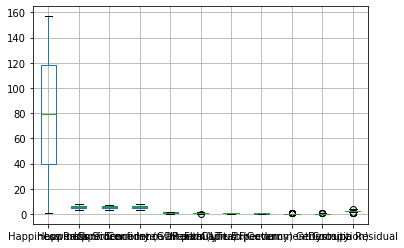

In [68]:
#이상치 확인 
df1.boxplot()

In [69]:
df1.head(1)

,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,,
Denmark,Western Europe,1,7.526,7.46,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939


In [70]:
df1.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [71]:
df1.corr() #상관관계

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.995743,-0.994928,-0.995525,-0.793577,-0.733276,-0.767991,-0.557169,-0.387102,-0.145369,-0.542616
Happiness Score,-0.995743,1.000000,0.999485,0.999474,0.790322,0.739252,0.765384,0.566827,0.402032,0.156848,0.543738
Lower Confidence Interval,-0.994928,0.999485,1.000000,0.997919,0.790673,0.741523,0.769177,0.566857,0.404840,0.158025,0.538793
Upper Confidence Interval,-0.995525,0.999474,0.997919,1.000000,0.789140,0.736184,0.760752,0.566203,0.398775,0.155495,0.548164
Economy (GDP per Capita),-0.793577,0.790322,0.790673,0.789140,1.000000,0.669540,0.837067,0.362283,0.294185,-0.025531,0.068624
Family,-0.733276,0.739252,0.741523,0.736184,0.669540,1.000000,0.588377,0.450208,0.213561,0.089629,0.119672
Health (Life Expectancy),-0.767991,0.765384,0.769177,0.760752,0.837067,0.588377,1.000000,0.341199,0.249583,0.075987,0.100857
Freedom,-0.557169,0.566827,0.566857,0.566203,0.362283,0.450208,0.341199,1.000000,0.502054,0.361751,0.091631
Trust (Government Corruption),-0.387102,0.402032,0.404840,0.398775,0.294185,0.213561,0.249583,0.502054,1.000000,0.305930,-0.002909
Generosity,-0.145369,0.156848,0.158025,0.155495,-0.025531,0.089629,0.075987,0.361751,0.305930,1.000000,-0.133001


In [72]:
# 가장 행복한 국가 20, 가장 불행한 국가 20  를 sort_values 로 확인해봅니다
df1.sort_values('Happiness Rank').tail(1)

,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,,
Burundi,Sub-Saharan Africa,157,2.905,2.732,3.078,0.06831,0.23442,0.15747,0.0432,0.09419,0.2029,2.10404


In [73]:
#한국 데이터를 뽑습니다
for name in df1.index:    
    if name.startswith('So'):
        print(name)

South Korea
Somalia
Somaliland Region
South Africa
South Sudan


In [74]:
df1.loc['South Korea']

Region                           Eastern Asia
Happiness Rank                             57
Happiness Score                         5.835
Lower Confidence Interval               5.747
Upper Confidence Interval               5.923
Economy (GDP per Capita)              1.35948
Family                                0.72194
Health (Life Expectancy)              0.88645
Freedom                               0.25168
Trust (Government Corruption)         0.07716
Generosity                            0.18824
Dystopia Residual                     2.35015
Name: South Korea, dtype: object

In [75]:
df1.loc['South Korea'] - df1.mean() 

Dystopia Residual                0.0243434
Economy (GDP per Capita)            0.4056
Family                          -0.0716811
Freedom                          -0.119314
Generosity                      -0.0543949
Happiness Rank                    -21.9809
Happiness Score                   0.452815
Health (Life Expectancy)          0.328831
Lower Confidence Interval         0.464605
Region                                 NaN
Trust (Government Corruption)   -0.0604638
Upper Confidence Interval         0.441025
dtype: object

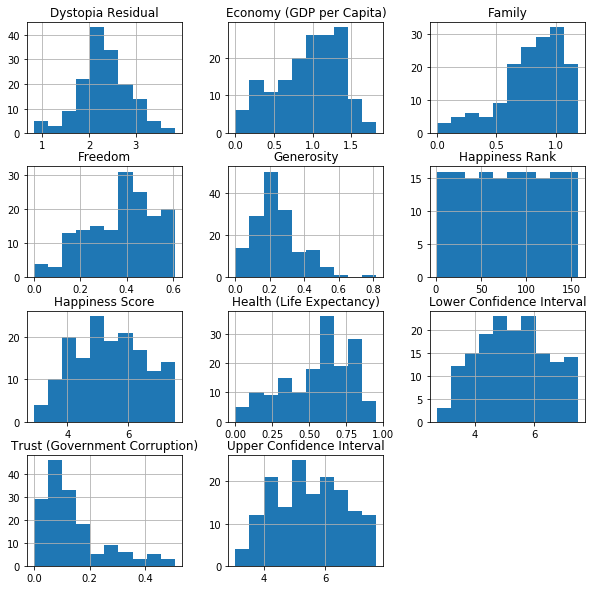

In [78]:
h = df1.hist(figsize=(10,10))

In [81]:
df1.columns

Index(['Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

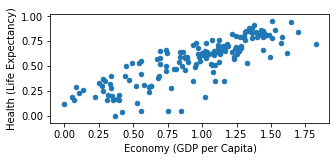

In [87]:
h = df1.plot(x='Economy (GDP per Capita)',y='Health (Life Expectancy)',\
          kind='scatter', figsize=(5,2))

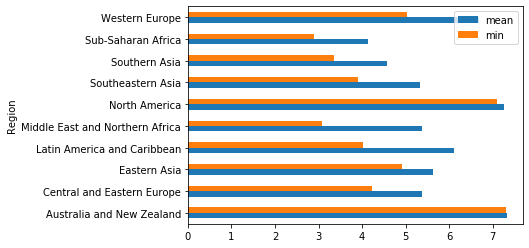

In [95]:
#df1.groupby('Region').aggregate('mean')['Happiness Score'].plot.barh()
df1.groupby('Region').aggregate(['mean','min'])['Happiness Score'].plot.barh()

In [89]:
df1.groupby('Region').aggregate('mean')

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,,
Australia and New Zealand,8.500000,7.323500,7.252500,7.394500,1.402545,1.138770,0.841080,0.574920,0.371175,0.484040,2.511015
Central and Eastern Europe,78.448276,5.370690,5.283690,5.457690,1.047537,0.861855,0.631592,0.300528,0.088072,0.170898,2.270222
Eastern Asia,67.166667,5.624167,5.550167,5.698167,1.277312,0.910428,0.806680,0.387282,0.118347,0.223563,1.900682
Latin America and Caribbean,48.333333,6.101750,5.976750,6.226750,0.993410,0.898432,0.612703,0.426646,0.106016,0.208428,2.856078
Middle East and Northern Africa,78.105263,5.386053,5.274895,5.497211,1.139323,0.695644,0.616438,0.309769,0.161526,0.186749,2.276677
North America,9.500000,7.254000,7.177500,7.330500,1.474055,1.071960,0.803300,0.527665,0.230985,0.429555,2.716335
Southeastern Asia,80.000000,5.338889,5.249556,5.428222,0.896381,0.791756,0.561369,0.490123,0.148104,0.446150,2.004910
Southern Asia,111.714286,4.563286,4.485000,4.641571,0.660671,0.480694,0.453670,0.350026,0.104899,0.343281,2.170101
Sub-Saharan Africa,129.657895,4.136421,4.024895,4.247947,0.474321,0.593656,0.239872,0.315424,0.120379,0.226348,2.166359
